## Sequence
- list, tuple, str[링크](https://jjeongttakgoori.tistory.com/27)

Compact array : 배열의 각 요소에 데이터를 직접 저장(같은 타입의 데이터를 관리할 때 사용)<br>
``` python
from array import array
primes = array['i', [2,3,5,7,11]]
```

Reference array : 객체를 가리키는 레퍼런스(화살표)를 저장(서로 다른 타입, 가변 길이를 저장할 때 사용/list, tuple)

**Insertion**(A.insert(i, o))<br>
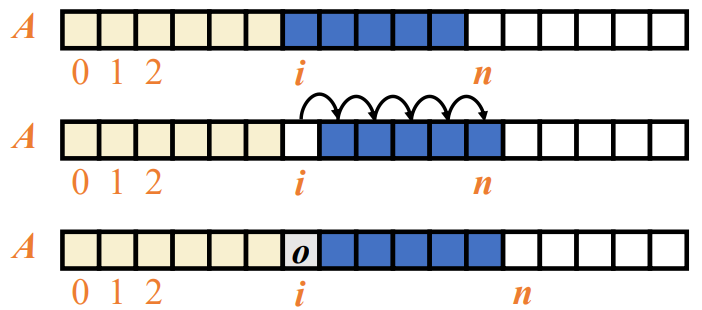<br>
Worst case(i=0) → O(n)

**Removal** del A[i]<br>
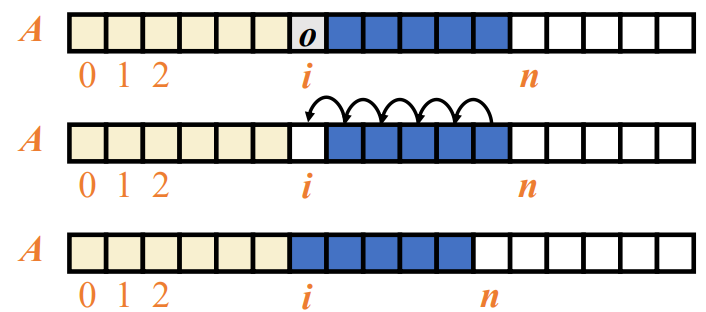<br>
Worst case(i=0) → O(n)

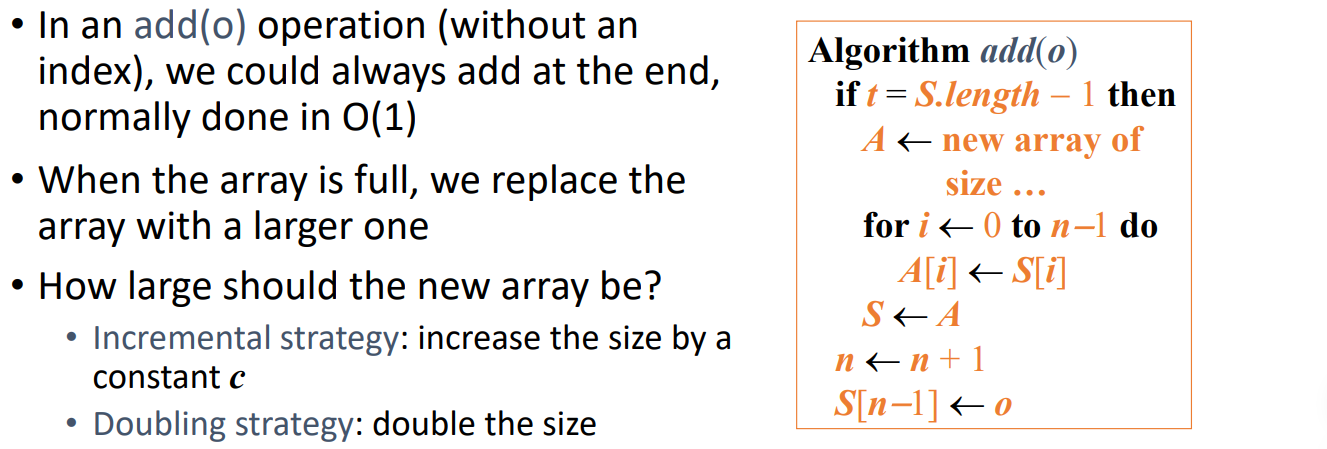<br>
기본적으로 array 길이 제한 → 길이를 늘려야 함!<br>
Asymptotic time : 무한대로 갈 때 근사하는 시간(Big O)<br>
Amortized time : 최악의 경우에서 T(n)/n

- incremental strategy
    - 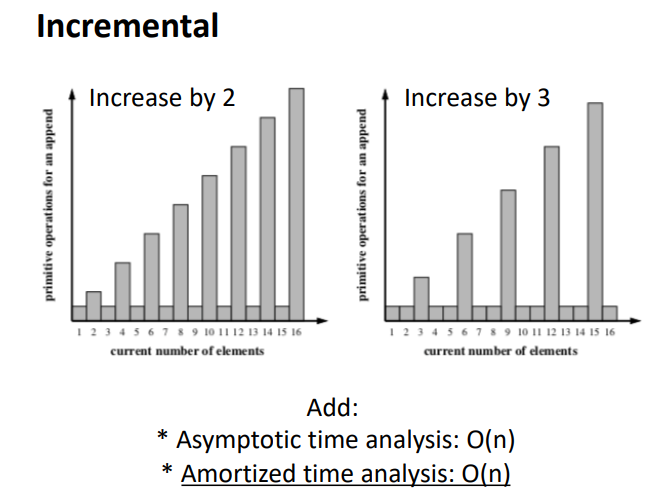
- Doubling strategy
    - 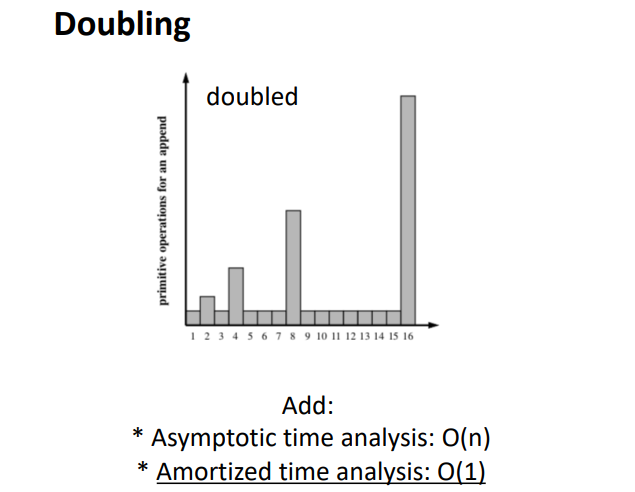

In [2]:
t = (['A','B','C'], ['D','E','F'], ['G','H','I'])

In [3]:
t[0] = ['X','Y','Z'] # immutable

TypeError: 'tuple' object does not support item assignment

In [5]:
t[0][0] = 'X' # tuple is immutable but list inside tuple is mutable
t

(['X', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'])

# Abstract Data Type(ADT)
: 구현 방법 없이 특성만 명시해둔 자료구조의 한 가지 형태.(= 규칙의 나열)<br>
example : Stack, Queue

## Stack
: 밑바닥부터 차곡차곡 데이터를 쌓아올린 형태의 자료구조(LIFO)
- space used : O(n)
- operation : O(1)

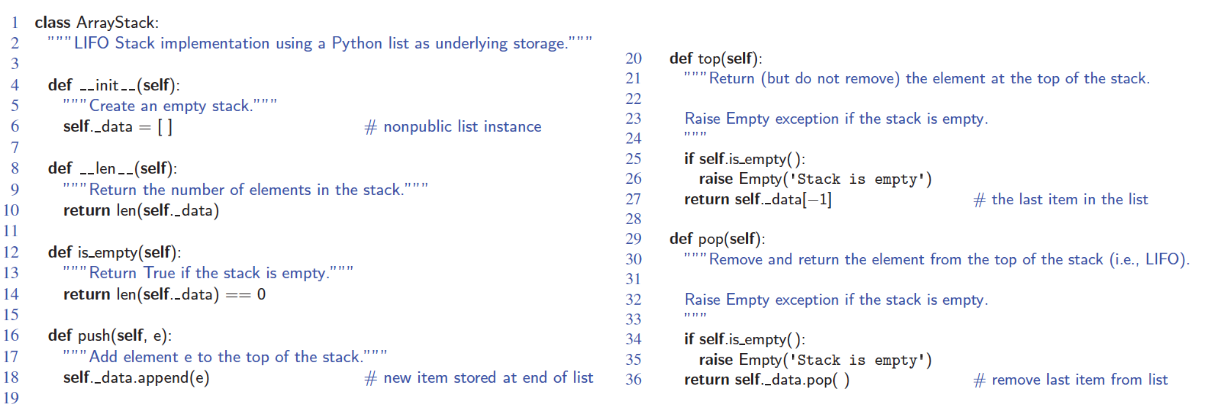

In [2]:
def push(stack, item):
    stack.append(item)
    return stack
def pop(stack):
    return stack.pop()
def is_empty(stack):
    return len(stack) == 0
stack = []
push(stack, 1)
push(stack, 2)
push(stack, 3)
print(stack)
print(pop(stack))
print(pop(stack))
print(pop(stack))
print(is_empty(stack))

[1, 2, 3]
3
2
1
True


### Expression evaluator
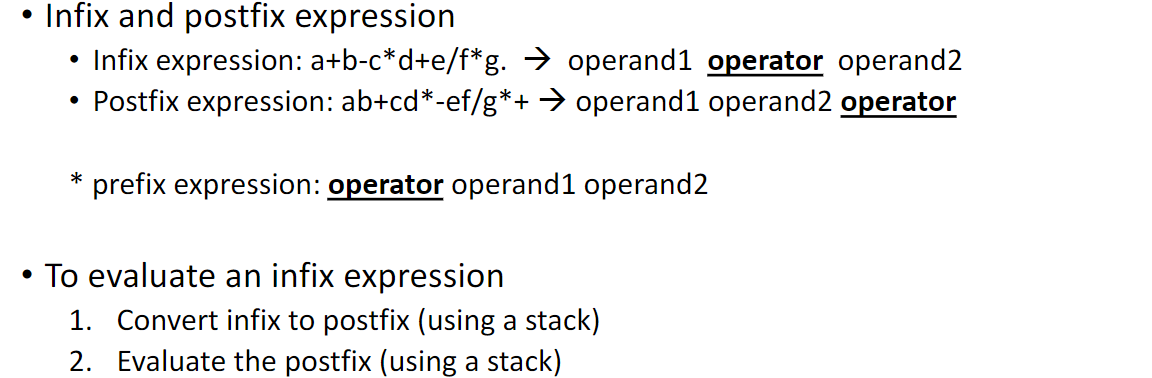
- Infix : a (연산자) b
    <br>ex\)1+2-3\*4+5/6\*7
- Postfix : ab (연산자)
    <br>ex\)12+34*-56/7*+

잘못된 수식이 들어오면 어떤 에러가 날까?

In [3]:
# convert infix to postfix
def infix_to_postfix(infix):
    precedence = {'+':1, '-':1, '*':2, '/':2, '^':3}
    stack = []
    postfix = []
    for char in infix:
        if char.isalnum():
            postfix.append(char)
        elif char == '(':
            stack.append(char)
        elif char == ')':
            while stack and stack[-1] != '(':
                postfix.append(stack.pop())
            stack.pop()
        else:
            while stack and precedence[stack[-1]] >= precedence[char]:
                postfix.append(stack.pop())
            stack.append(char)
    while stack:
        postfix.append(stack.pop())
    return ''.join(postfix)
infix_to_postfix('A+B*C-D*E')

'ABC*+DE*-'

In [6]:
# convert postfix to infix
def postfix_to_infix(postfix):
    stack = []
    for char in postfix:
        if char.isalnum():
            stack.append(char)
        else:
            op2 = stack.pop()
            op1 = stack.pop()
            stack.append('({}{}{})'.format(op1, char, op2))
    return stack.pop()
postfix_to_infix('ABC*+DE*-')

'((A+(B*C))-(D*E))'

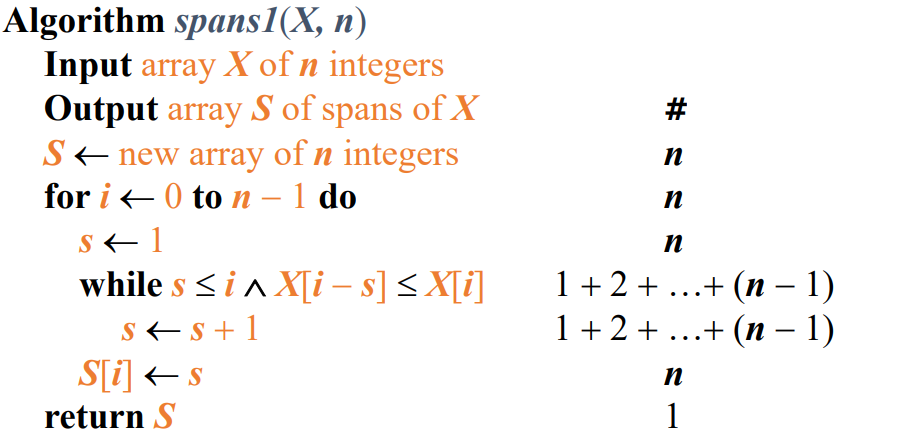
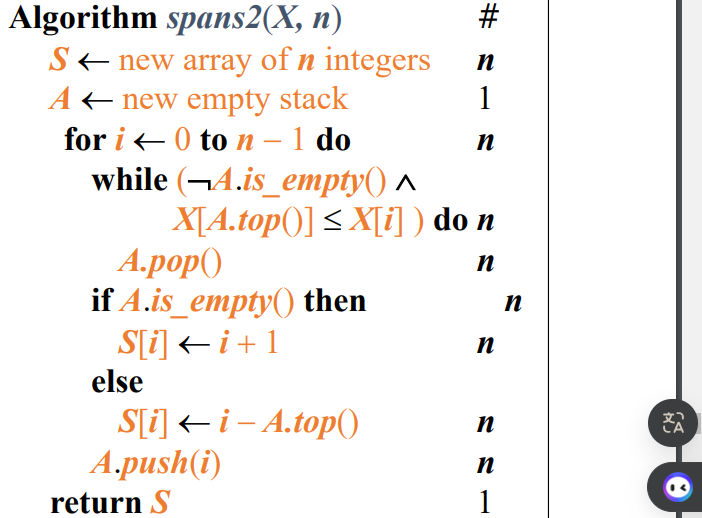

In [6]:
def span2(X, n):
    S = []
    A = []
    for i in range(n):
        while len(A) > 0 and X[i] >= X[A[-1]]:
            A.pop()
            print(i, ':', A)
        if len(A) == 0:
            S.insert(i, i+1)
        else :
            S.insert(i, i-A[-1])
        A.append(i)
        print(i, ':', A)
    return S
X = [6, 3, 4, 1, 2, 3, 5, 4]
n = len(X)
print(span2(X, n))

0 : [0]
1 : [0, 1]
2 : [0]
2 : [0, 2]
3 : [0, 2, 3]
4 : [0, 2]
4 : [0, 2, 4]
5 : [0, 2]
5 : [0, 2, 5]
6 : [0, 2]
6 : [0]
6 : [0, 6]
7 : [0, 6, 7]
[1, 1, 2, 1, 2, 3, 6, 1]


## Queue
: 줄을 서서 기다리는듯한 자료구조(FIFO)
- O(n) 연산

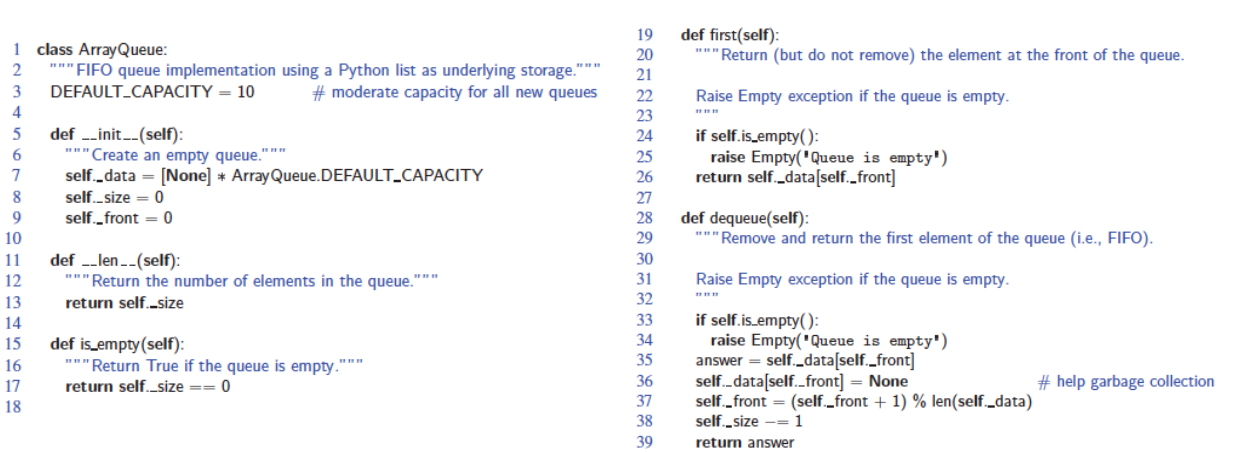

In [8]:
# Queue
class Queue:
    def __init__(self):
        self.queue = []
    def enqueue(self, item):
        self.queue.append(item)
    def dequeue(self):
        return self.queue.pop(0)
    def is_empty(self):
        return len(self.queue) == 0
array = Queue()
array.enqueue(1)
array.enqueue(2)
array.enqueue(3)
print(array.queue)
print(array.dequeue(), array.queue)
print(array.dequeue(), array.queue)
print(array.dequeue(), array.queue)

[1, 2, 3]
1 [2, 3]
2 [3]
3 []
